In [26]:
import optax
from experimental.breastcancer_t import breast_task

opts = [optax.sgd(0.005), optax.adam(0.0025), optax.noisy_sgd(0.001, 0.001, 0.75), optax.adamw(0.001)]
val_accs = []
test_accs = []

for key in [42,43,44, 45, 46]:
    temp = []
    test = []
    for idx, opt in enumerate(opts):
        task = breast_task(state=key)
        test_acc, vals = task.train(opt, 10000)
        temp.append(vals)
        test.append(test_acc)

    val_accs.append(temp)
    test_accs.append(test)

(15, 10)
(10,)
(10, 1)
(1,)
Epoch 10000/10000
Train Loss: 0.1105, Train Accuracy: 0.9577
Test Loss: 0.0868, Test Accuracy: 0.9650
(15, 10)
(10,)
(10, 1)
(1,)
Epoch 10000/10000
Train Loss: 0.0001, Train Accuracy: 1.0000
Test Loss: 0.2253, Test Accuracy: 0.9580
(15, 10)
(10,)
(10, 1)
(1,)
Epoch 10000/10000
Train Loss: 0.1783, Train Accuracy: 0.9296
Test Loss: 0.1559, Test Accuracy: 0.9441
(15, 10)
(10,)
(10, 1)
(1,)
Epoch 10000/10000
Train Loss: 0.0003, Train Accuracy: 1.0000
Test Loss: 0.1369, Test Accuracy: 0.9860
(15, 10)
(10,)
(10, 1)
(1,)
Epoch 10000/10000
Train Loss: 0.1271, Train Accuracy: 0.9472
Test Loss: 0.0833, Test Accuracy: 0.9790
(15, 10)
(10,)
(10, 1)
(1,)
Epoch 10000/10000
Train Loss: 0.0000, Train Accuracy: 1.0000
Test Loss: 0.3506, Test Accuracy: 0.9650
(15, 10)
(10,)
(10, 1)
(1,)
Epoch 10000/10000
Train Loss: 0.1986, Train Accuracy: 0.9296
Test Loss: 0.1716, Test Accuracy: 0.9301
(15, 10)
(10,)
(10, 1)
(1,)
Epoch 10000/10000
Train Loss: 0.0002, Train Accuracy: 1.0000
T

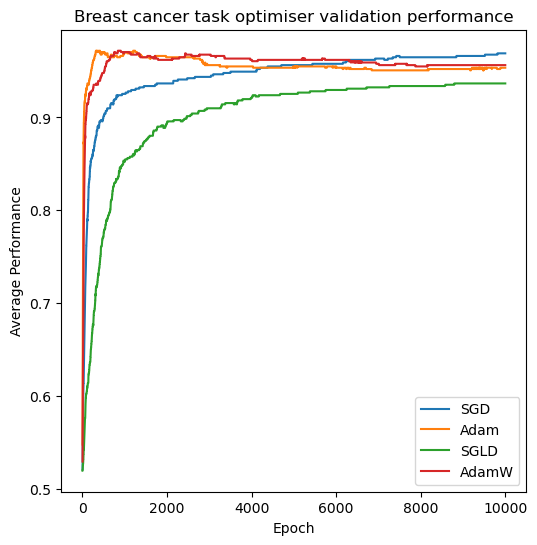

In [32]:
import matplotlib.pyplot as plt
import numpy as np

vals_np = np.array(val_accs)


# Compute the column-wise mean
column_means = vals_np.mean(axis=0)
std = vals_np.std(axis=0)

# Create plot
plt.figure(figsize=(6, 6))

# Assuming the x-axis represents the epochs
epochs = np.arange(1, 10001)  # or whatever the number of epochs/steps is

# Assuming the optimizers are as follows
optimizers = ['SGD', 'Adam', 'SGLD', 'AdamW']

for idx, optimizer in enumerate(optimizers):
    plt.plot(epochs, column_means[idx], label=optimizer)
    #plt.fill_between(epochs, column_means[idx] - std[idx], column_means[idx] + std[idx], alpha=0.2)

# for idx, optimizer in enumerate(optimizers):
#     plt.plot(epochs[1000:], column_means[idx][1000:], label=optimizer)
#     plt.fill_between(epochs[1000:], column_means[idx][1000:] - std[idx][1000:], column_means[idx][1000:] + std[idx][1000:], alpha=0.2)

plt.xlabel('Epoch')
plt.ylabel('Average Performance')
plt.title('Breast cancer task optimiser validation performance')
plt.legend()

plt.show()

In [33]:
tests_np = np.array(test_accs)


# Compute the column-wise mean
column_means = tests_np.mean(axis=0)
std = tests_np.std(axis=0)

print(std)

[0.0120312  0.0071315  0.00948578 0.01618997]
